# WIND ROSE DIAGRAM

Dalam pembuatan rose diagram, dibagi kepada 3 langkah yaitu
1. Input data dan cek data tersebut khususnya varibel yg buat dipanggil,terus pelajarin dulu dia dimensinya gimana 
2. Masukan data yang ada pada variabel dalam nc ke variabel buatan kita 
3. Hitung besaran dan arah 
4. buat rose diagram

In [1]:
#masukin library dulu 
from windrose import WindroseAxes
import netCDF4 as nc
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt

## Input data Angin

In [19]:
#masukin lokasi .nc nya dimana
fn='D:/smt7/asisten andat/anginSST2017.nc'
#buka file nc nya dan liat isinya ada apa aja (variabel dan dimensi)
ds=nc.Dataset(fn)
ds


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2020-11-05 00:38:28 GMT by grib_to_netcdf-2.19.0: grib_to_netcdf /data/scratch/20201105-0030/b2/_mars-webmars-public-svc-green-003-6fe5cac1a363ec1525f54343b6cc9fd8-Of0xUm.grib -o /data/scratch/20201105-0030/0d/_grib2netcdf-webmars-public-svc-green-000-6fe5cac1a363ec1525f54343b6cc9fd8-VAd83e.nc -utime
    dimensions(sizes): longitude(57), latitude(41), time(249)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 sst(time,latitude,longitude), int16 u10(time,latitude,longitude), int16 v10(time,latitude,longitude)
    groups: 

In [18]:
data=pd.read_excel(r'D:/smt5/andat/praktikum/modul4 andat/Modul4.xlsx',sheets='Arus Rose and Feather')
data_angin=pd.DataFrame(data, columns=['U (cm/s)','V (cm/s)'])
display(data_angin)

,U (cm/s),V (cm/s)
0,-4.25,0.03
1,-3.86,-0.03
2,-3.21,0.29
3,-3.63,0.15
4,-4.70,-0.31
...,...,...
139,-6.63,0.22
140,-7.25,0.11
141,-5.97,-0.73
142,-5.39,0.43


## Deklarasi Variabel Data Angin
masukin variabel dalam nc ke variabel buatan kita sendiri

rose diagram itu, inputnya harus time series sedangkan pada input data kita tau kalo data yg di download merupakan data spasial makanya diambil deh satu kolom latitude dan longitudenya itu maksudnya ngambil 1 grid.



In [20]:

u=ds.variables['u10'][:,5,5]
v=ds.variables['v10'][:,5,5]
lon=ds.variables['longitude'][:]
lat=ds.variables['latitude'][:]
time=ds.variables['time'][:]

#melihat dimensi masing2 variabel
print('dimensi u',np.shape(u))
print('dimensi v',np.shape(v))
print('dimensi lon',np.shape(lon))
print('dimensi lat',np.shape(lat))
print('dimensi time',np.shape(time))

dimensi u (249,)
dimensi v (249,)
dimensi lon (57,)
dimensi lat (41,)
dimensi time (249,)


In [21]:
#untuk melihat data
data_angin=pd.DataFrame(u,columns=['u'])
data_angin['v']=v
display(data_angin)

,u,v
0,-3.503594,3.912547
1,0.098473,2.514268
2,-0.667644,1.467266
3,-0.648278,2.085736
4,-3.881359,1.723361
...,...,...
244,-4.520177,0.699195
245,-4.165134,-0.324332
246,-4.493065,-0.352929
247,-4.802662,-0.197991


## Besaran dan Arah Angin
untuk membuat rose diagram, data input nya harus berupa magnitudo dan arah

In [ ]:

mag=[]
for i in range(len(data_angin)):
    rumuz=math.hypot(data_angin['U (cm/s)'].iloc[i],data_angin['V (cm/s)'].iloc[i])
    mag.append(rumuz)
data_angin['magnitude']=mag[:]

dir=[]
for i in range(len(data_angin)):
    rumus=180+(180/math.pi)*math.atan2(data_angin['U (cm/s)'].iloc[i],data_angin['V (cm/s)'].iloc[i])
    rumus=rumus%360
    dir.append(rumus)

data_angin['direction']=dir[:]

display(data_angin)

In [22]:

mag=[]
for i in range(len(data_angin)):
    rumuz=math.hypot(data_angin['u'].iloc[i],data_angin['v'].iloc[i])
    mag.append(rumuz)
data_angin['magnitude']=mag[:]

dir=[]
for i in range(len(data_angin)):
    rumus=180+(180/math.pi)*math.atan2(data_angin['u'].iloc[i],data_angin['v'].iloc[i])
    rumus=rumus%360
    dir.append(rumus)

data_angin['direction']=dir[:]

display(data_angin)

,u,v,magnitude,direction
0,-3.503594,3.912547,5.251970,138.156303
1,0.098473,2.514268,2.516196,182.242877
2,-0.667644,1.467266,1.612023,155.533238
3,-0.648278,2.085736,2.184161,162.733967
4,-3.881359,1.723361,4.246754,113.941690
...,...,...,...,...
244,-4.520177,0.699195,4.573934,98.792998
245,-4.165134,-0.324332,4.177743,85.547463
246,-4.493065,-0.352929,4.506904,85.508655
247,-4.802662,-0.197991,4.806741,87.639297


## Membuat Wind Rose

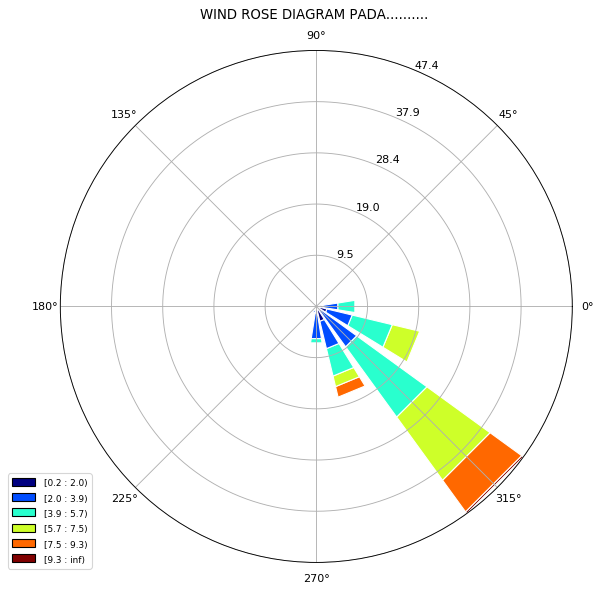

In [23]:
ax = WindroseAxes.from_ax()
ax.bar(data_angin['direction'], data_angin['magnitude'], normed=True, opening=0.8, edgecolor='white', blowto=False)
ax.set_title('WIND ROSE DIAGRAM PADA.......... ')
ax.set_legend(bbox_to_anchor=(-0.1, -0.01))
#plt.savefig('D:/smt7/asisten andat/windrose1.jpeg',dpi=300)

# CURRENT ROSE DIAGRAM
## Input Data Arus

In [12]:
#masukin lokasi .nc nya dimana
fn2='D:/smt7/asisten andat/arus2017.nc4'
#buka file nc nya dan liat isinya ada apa aja (variabel dan dimensi)
ds2=nc.Dataset(fn2)
ds2


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    classification_level: UNCLASSIFIED
    distribution_statement: Approved for public release. Distribution unlimited.
    downgrade_date: not applicable
    classification_authority: not applicable
    institution: Naval Oceanographic Office
    source: HYCOM archive file
    history: archv2ncdf3z
    field_type: instantaneous
    Conventions: CF-1.6 NAVO_netcdf_v1.1
    History: Translated to CF-1.0 Conventions by Netcdf-Java CDM (CFGridWriter2)
Original Dataset = GLBv0.08/expt_57.7; Translation Date = 2020-11-05T00:32:39.005Z
    geospatial_lat_min: -7.28000020980835
    geospatial_lat_max: -2.319999933242798
    geospatial_lon_min: 94.9599609375
    geospatial_lon_max: 102.0
    dimensions(sizes): time(8), depth(1), lat(63), lon(89)
    variables(dimensions): int16 water_u(time,depth,lat,lon), float64 time(time), float64 depth(depth), float64 lat(lat), float64 lon(lon), int16 water_v(time,depth,l

## Deklarasi Variabel Arus
grid yang dipilih pada arus u dan v sama kaya grid angin aja supaya diasumsikan tempatnya deketan

In [13]:

u2=ds2.variables['water_u'][:,:,5,5]
v2=ds2.variables['water_v'][:,:,5,5]
lon2=ds2.variables['lon'][:]
lat2=ds2.variables['lat'][:]
time2=ds2.variables['time'][:]

#melihat dimensi masing2 variabel
print('dimensi u',np.shape(u2))
print('dimensi v',np.shape(v2))
print('dimensi lon',np.shape(lon2))
print('dimensi lat',np.shape(lat2))
print('dimensi time',np.shape(time2))

dimensi u (8, 1)
dimensi v (8, 1)
dimensi lon (89,)
dimensi lat (63,)
dimensi time (8,)


In [14]:
#untuk melihat data
data_arus=pd.DataFrame(u2,columns=['u'])
data_arus['v']=v2
display(data_arus)

,u,v
0,0.165,-0.359
1,0.146,-0.335
2,0.124,-0.307
3,0.101,-0.278
4,0.067,-0.270
5,-0.017,-0.264
6,-0.167,-0.241
7,-0.231,-0.276


## Besaran dan Arah Arus

In [15]:

mag2=[]
for i in range(len(data_arus)):
    rumuz2=math.hypot(data_arus['u'].iloc[i],data_arus['v'].iloc[i])
    mag2.append(rumuz2)
data_arus['magnitude']=mag2[:]

dir2=[]
for i in range(len(data_arus)):
    rumus2=180+(180/math.pi)*math.atan2(data_arus['u'].iloc[i],data_arus['v'].iloc[i])
    rumus2=rumus2%360
    dir2.append(rumus2)
data_arus['direction']=dir2[:]

display(data_arus)

,u,v,magnitude,direction
0,0.165,-0.359,0.395103,335.316015
1,0.146,-0.335,0.365433,336.451420
2,0.124,-0.307,0.331097,338.005784
3,0.101,-0.278,0.295779,340.033445
4,0.067,-0.270,0.278189,346.063662
5,-0.017,-0.264,0.264547,3.684414
6,-0.167,-0.241,0.293206,34.719872
7,-0.231,-0.276,0.359913,39.927866


## Membuat Current Rose

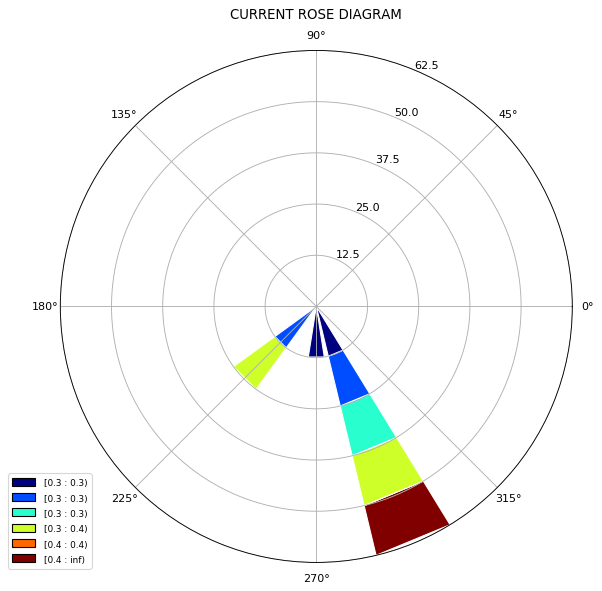

In [16]:
ax = WindroseAxes.from_ax()
ax.bar(data_arus['direction'], data_arus['magnitude'], normed=True, opening=0.8, edgecolor='white', blowto=True)
ax.set_title('CURRENT ROSE DIAGRAM')
ax.set_legend(bbox_to_anchor=(-0.1, -0.01))
#plt.savefig('D:/smt7/asisten andat/currentrose1.jpeg',dpi=300)